# Preprocessing

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, cm
from ISLP.svm import plot as plot_svm
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('/Users/lakshitgupta/Library/CloudStorage/OneDrive-SeattleUniversity/Quater3/Machine Learning-2/Written Homeworks/Housing.csv')

In [3]:
print(data.head())

    SERIAL  DENSITY  OWNERSHP  OWNERSHPD  COSTELEC  COSTGAS  COSTWATR  \
0  1371772    920.0         1         13      9990     9993       360   
1  1371773   3640.9         2         22      1080     9993      1800   
2  1371773   3640.9         2         22      1080     9993      1800   
3  1371774     22.5         1         13       600     9993      9993   
4  1371775   3710.4         2         22      3600     9993      9997   

   COSTFUEL  HHINCOME   VALUEH  ...  NFAMS  NCOUPLES  PERNUM  PERWT  AGE  \
0      9993     75000   700000  ...      1         0       1     14   52   
1      9993     13600  9999999  ...      2         0       1     83   22   
2      9993     13600  9999999  ...      2         0       2    106   22   
3      9993      7000   800000  ...      1         0       1     33   62   
4      9993     50500  9999999  ...      1         0       1    297   50   

   MARST  BIRTHYR  EDUC  EDUCD  INCTOT  
0      6     1969     7     71   75000  
1      6     1999    1

In [4]:
data.shape

(75388, 24)

In [5]:
missing_values = data.isna().sum().sum()
print(f"Number of missing values: {missing_values}")

Number of missing values: 0


In [6]:
data = data.drop(['OWNERSHPD','NCOUPLES','NFAMS','PERNUM', 'PERWT', 'BIRTHYR','EDUC','EDUCD','INCTOT','VALUEH'], axis=1)

In [7]:
data = data[~data['OWNERSHP'].isin([0])]
data = data[~data['BEDROOMS'].isin([00])]
data = data[~data['ROOMS'].isin([00])]
data = data[~data['BUILTYR2'].isin([00])]
data = data[~data['MARST'].isin([9])]
data = data[~data['VEHICLES'].isin([0,9])]
data = data[~data['AGE'].isin([999])]

print(data.shape)

(72631, 14)


In [8]:
data['MARST'] = data['MARST'].replace({1: 'Married', 2: 'Married', 3: 'Divorced', 4: 'Divorced', 5: 'Single', 6: 'Single'})
data = pd.get_dummies(data, columns=['MARST'])
print(data.columns)

Index(['SERIAL', 'DENSITY', 'OWNERSHP', 'COSTELEC', 'COSTGAS', 'COSTWATR',
       'COSTFUEL', 'HHINCOME', 'ROOMS', 'BUILTYR2', 'BEDROOMS', 'VEHICLES',
       'AGE', 'MARST_Divorced', 'MARST_Married', 'MARST_Single'],
      dtype='object')


In [9]:
print(data.head())

    SERIAL  DENSITY  OWNERSHP  COSTELEC  COSTGAS  COSTWATR  COSTFUEL  \
0  1371772    920.0         1      9990     9993       360      9993   
1  1371773   3640.9         2      1080     9993      1800      9993   
2  1371773   3640.9         2      1080     9993      1800      9993   
3  1371774     22.5         1       600     9993      9993      9993   
4  1371775   3710.4         2      3600     9993      9997      9993   

   HHINCOME  ROOMS  BUILTYR2  BEDROOMS  VEHICLES  AGE  MARST_Divorced  \
0     75000      7         7         4         2   52               0   
1     13600      6         4         4         2   22               0   
2     13600      6         4         4         2   22               0   
3      7000      5         5         4         2   62               1   
4     50500      4         6         3         2   50               1   

   MARST_Married  MARST_Single  
0              0             1  
1              0             1  
2              0             

In [10]:
data_sorted = data.sort_values(['SERIAL', 'AGE'], ascending=[True, False])
data_sorted = data_sorted.groupby('SERIAL').first().reset_index()
data = data_sorted.drop(columns=['SERIAL'])
data.shape

(29049, 15)

In [11]:
data.columns

Index(['DENSITY', 'OWNERSHP', 'COSTELEC', 'COSTGAS', 'COSTWATR', 'COSTFUEL',
       'HHINCOME', 'ROOMS', 'BUILTYR2', 'BEDROOMS', 'VEHICLES', 'AGE',
       'MARST_Divorced', 'MARST_Married', 'MARST_Single'],
      dtype='object')

In [12]:
X = data[['DENSITY', 'COSTELEC', 'COSTGAS', 'COSTWATR', 'COSTFUEL',
          'HHINCOME', 'ROOMS', 'BUILTYR2', 'BEDROOMS', 
          'VEHICLES', 'AGE', 'MARST_Divorced', 'MARST_Married', 'MARST_Single']]
y = data['OWNERSHP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear model

Cost: 0.01, Accuracy: 84.50%
Cost: 0.1, Accuracy: 84.57%
Cost: 1, Accuracy: 84.57%
Cost: 10, Accuracy: 84.56%
Cost: 100, Accuracy: 84.57%
Cost: 250, Accuracy: 84.57%
Cost: 500, Accuracy: 84.54%


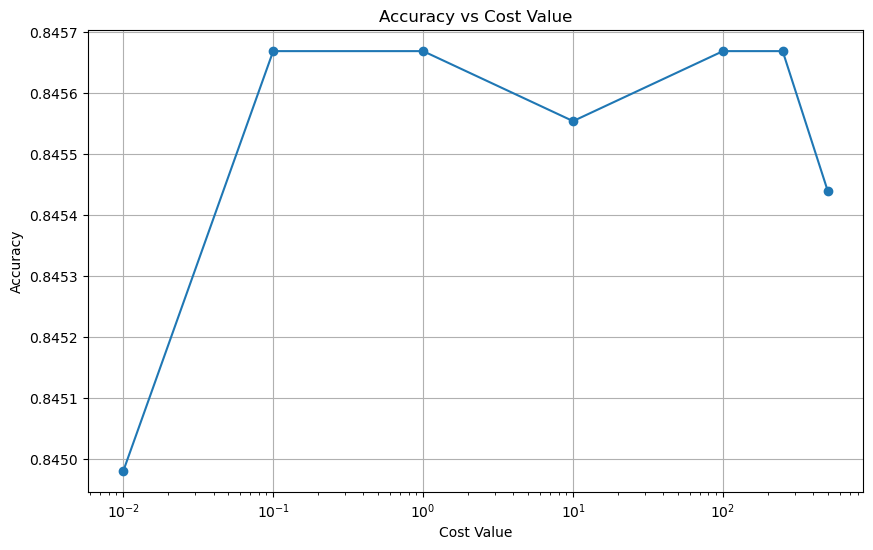

In [13]:
cost_values = [0.01, 0.1, 1, 10, 100, 250, 500]

costs = []
accuracies = []

for c in cost_values:
    # Initialize the SVM classifier with the specified cost value
    svm_classifier = SVC(kernel='linear', C=c)
    
    try:
        
        svm_classifier.fit(X_train_scaled, y_train)
        y_pred = svm_classifier.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        costs.append(c)
        accuracies.append(accuracy)
        
        print(f"Cost: {c}, Accuracy: {accuracy*100:.2f}%")
    except Exception as e:
        print(f"Error occurred for cost {c}: {e}")

plt.figure(figsize=(10, 6))
plt.plot(costs, accuracies, marker='o')
plt.title('Accuracy vs Cost Value')
plt.xlabel('Cost Value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)
plt.show()


Best parameters found by GridSearchCV:
{'C': 500}


Accuracy of the best model: 84.54%


In [18]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 250, 500]}
costs = param_grid['C']
accuracies = []

grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Cost values and accuracies for each cost:")
for cost, accuracy in zip(costs, grid_search.cv_results_['mean_test_score']):
    print(f"Cost: {cost}, Accuracy: {accuracy*100:.2f}%")

print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy of the best model: {accuracy*100:.2f}%")

Cost values and accuracies for each cost:
Cost: 0.01, Accuracy: 84.28%
Cost: 0.1, Accuracy: 84.31%
Cost: 1, Accuracy: 84.30%
Cost: 10, Accuracy: 84.30%
Cost: 100, Accuracy: 84.29%
Cost: 250, Accuracy: 84.31%
Cost: 500, Accuracy: 84.33%

Best parameters found by GridSearchCV:
{'C': 500}

Accuracy of the best model: 84.54%


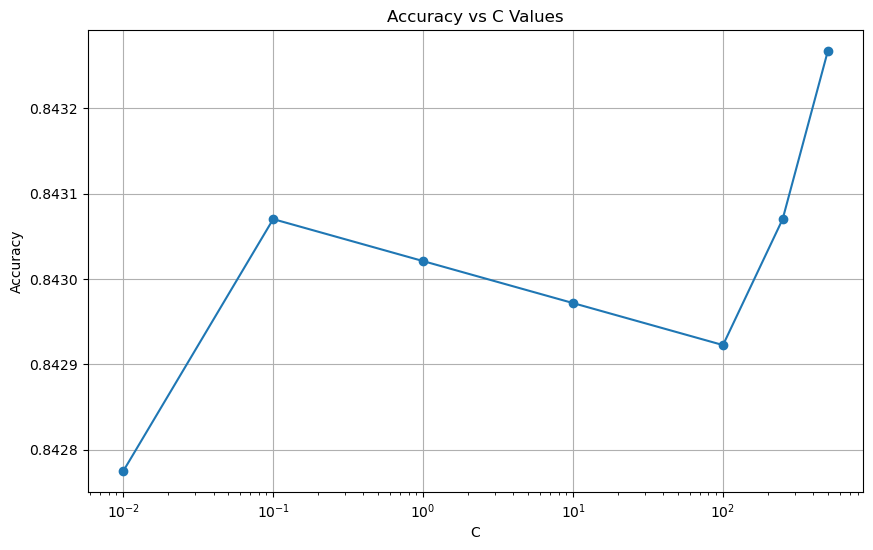

In [19]:
mean_test_scores = np.array(grid_search.cv_results_['mean_test_score'])

# Plot accuracy against C values
plt.figure(figsize=(10, 6))
plt.plot(param_grid['C'], mean_test_scores, marker='o')
plt.title('Accuracy vs C Values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)
plt.show()

Accuracy with selected features: 84.11%
         Feature  Importance
7            AGE    0.051597
5       BEDROOMS    0.033184
2       COSTWATR    0.017778
4          ROOMS    0.009030
8  MARST_Married    0.006189
6       VEHICLES    0.005309
3       HHINCOME    0.003974
1        COSTGAS    0.002647
0       COSTELEC    0.002058
9   MARST_Single   -0.000153


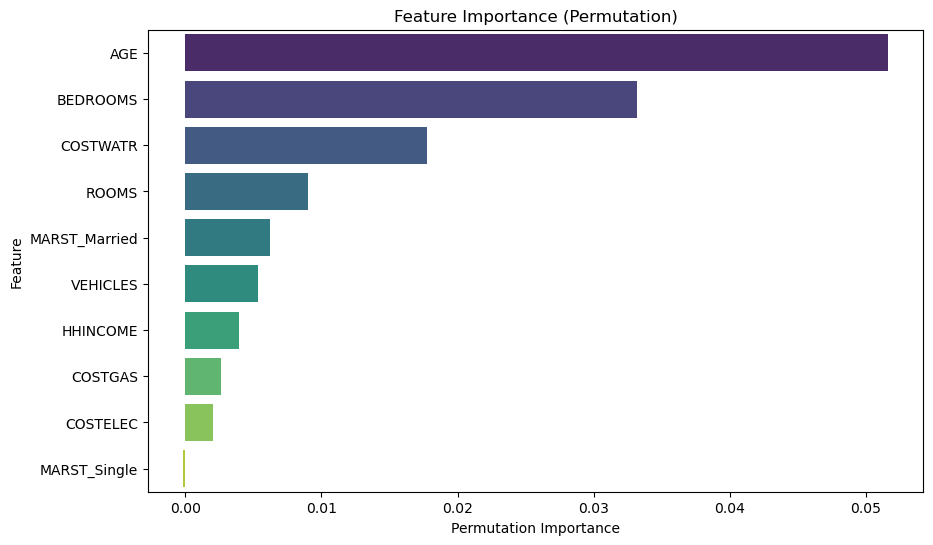

In [20]:
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(X_train_scaled, y_train)
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]

svm_selected = SVC(kernel='linear', C=500, random_state=123)
svm_selected.fit(X_train_scaled[:, selected_features], y_train)

accuracy = svm_selected.score(X_test_scaled[:, selected_features], y_test)
print("Accuracy with selected features: {:.2f}%".format(accuracy * 100))

# Permutation importance
perm_importance = permutation_importance(svm_selected, X_test_scaled[:, selected_features], y_test, n_repeats=30, random_state=123)

# Feature importances
importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': perm_importance['importances_mean']})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Permutation)')
plt.show()

In [ ]:
X_top = data[['AGE', 'BEDROOMS']]
y = data['OWNERSHP']
X_trainTop, X_testTop, y_trainTop, y_testTop =  train_test_split(X_top, y, test_size = 0.3,random_state = 123)
svm_classifier = SVC(kernel='linear', C=500, cache_size=1000, verbose=True, max_iter=10000, random_state=123)
svm_classifier.fit(X_trainTop, y_trainTop)
y_pred = svm_classifier.predict(X_testTop)
accuracy = accuracy_score(y_testTop, y_pred)
print(f"Accuracy with top 2 predictors: {accuracy*100:.2f}%")

In [ ]:
X_top = data[['AGE', 'BEDROOMS']]
 
y = data['OWNERSHP']
X_trainTop, X_testTop, y_trainTop, y_testTop =  train_test_split(X_top, y, test_size = 0.3
                                                 ,random_state = 123)
 
scaler = StandardScaler().fit(X_trainTop)
X_trainScaledTop = scaler.transform(X_trainTop)
X_testNewScaledTop = scaler.transform(X_testTop)
linearsvc_top = SVC(kernel='linear', C=500, cache_size=1000, verbose=True, max_iter=10000, random_state=1)
linearsvc_top.fit(X_trainScaledTop, y_trainTop)
 
fig, ax = subplots(figsize=(8,8))
plot_svm(X_trainScaledTop,
         y_trainTop,
         linearsvc_top,
         ax=ax)
ax.set_xlabel('AGE')
ax.set_ylabel('BEDROOMS')
plt.title('SVM Decision Boundary with Top 2 Predictor Variables')
plt.show()
 

# Radial model

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.5, 1, 2, 3, 4]}

# GridSearchCV
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

In [ ]:
# Get the best model 
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the best model: {accuracy*100:.2f}%")


In [ ]:
mean_test_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['gamma']))

# Plot a heatmap of accuracy for different combinations of C and gamma
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, fmt='.3f', cmap="viridis", xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.title('Accuracy vs C and Gamma Values')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

In [ ]:
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(X_train_scaled, y_train)
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]

# Train SVM classifier with selected features
svm_selected = SVC(kernel='rbf', C=1, gamma=0.5, random_state=123)
svm_selected.fit(X_train_scaled[:, selected_features], y_train)

accuracy = svm_selected.score(X_test_scaled[:, selected_features], y_test)
print("Accuracy with selected features: {:.2f}%".format(accuracy * 100))

# Permutation importance
perm_importance = permutation_importance(svm_selected, X_test_scaled[:, selected_features], y_test, n_repeats=30, random_state=42)

# Feature importances
importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': perm_importance['importances_mean']})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Permutation)')
plt.show()

In [ ]:
X_top = data[['AGE', 'BEDROOMS']]
y = data['OWNERSHP']
X_trainTop, X_testTop, y_trainTop, y_testTop =  train_test_split(X_top, y, test_size = 0.3,random_state = 123)
svm_classifier = SVC(kernel='rbf', C=1, gamma=0.5, cache_size=1000, verbose=True, max_iter=10000, random_state=123)
svm_classifier.fit(X_trainTop, y_trainTop)
y_pred = svm_classifier.predict(X_testTop)
accuracy = accuracy_score(y_testTop, y_pred)
print(f"Accuracy with top 2 predictors: {accuracy*100:.2f}%")

In [ ]:
X_top = data[['BEDROOMS', 'AGE']]
 
y = data['OWNERSHP']
#spliting the data into train and test
X_trainTop, X_testTop, y_trainTop, y_testTop =  train_test_split(X_top, y, test_size = 0.3
                                                 ,random_state = 123)
 
scaler = StandardScaler().fit(X_trainTop)
X_trainScaledTop = scaler.transform(X_trainTop)
X_testNewScaledTop = scaler.transform(X_testTop)
radsvc_top = SVC(kernel='rbf', C=1, gamma=0.5, cache_size=1000, verbose=True, max_iter=10000, random_state=123)
radsvc_top.fit(X_trainScaledTop, y_trainTop)
 
    
fig, ax = subplots(figsize=(8,8))
plot_svm(X_trainScaledTop,
         y_trainTop,
         radsvc_top,
         ax=ax)
ax.set_xlabel('BEDROOMS')
ax.set_ylabel('AGE')
plt.title('SVM Decision Boundary with Top 2 Predictor Variables')


plt.show()

# Polynomial model

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4]}

grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

In [ ]:

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the best model: {accuracy*100:.2f}%")

In [ ]:
mean_test_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['degree']))

# Plot a heatmap of accuracy for different combinations of C and gamma
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, fmt='.3f', cmap="viridis", xticklabels=param_grid['degree'], yticklabels=param_grid['C'])
plt.title('Accuracy vs C and Degree Values')
plt.xlabel('Degree')
plt.ylabel('C')
plt.show()

In [ ]:
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(X_train_scaled, y_train)
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]

# Train SVM classifier with selected features
svm_selected = SVC(kernel='poly', C=100, degree=3, random_state=123)
svm_selected.fit(X_train_scaled[:, selected_features], y_train)

# Evaluate the model on the testing data
accuracy = svm_selected.score(X_test_scaled[:, selected_features], y_test)
print("Accuracy with selected features: {:.2f}%".format(accuracy * 100))

# Permutation importance
perm_importance = permutation_importance(svm_selected, X_test_scaled[:, selected_features], y_test, n_repeats=30, random_state=42)

# Feature importances
importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': perm_importance['importances_mean']})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Permutation)')
plt.show()

In [ ]:
X_top = data[['AGE', 'COSTWATR']]
y = data['OWNERSHP']
X_trainTop, X_testTop, y_trainTop, y_testTop =  train_test_split(X_top, y, test_size = 0.3,random_state = 123)
svm_classifier = SVC(kernel='poly', C=100,degree=3, cache_size=1000, verbose=True, max_iter=10000, random_state=123)
svm_classifier.fit(X_trainTop, y_trainTop)
y_pred = svm_classifier.predict(X_testTop)
accuracy = accuracy_score(y_testTop, y_pred)
print(f"Accuracy with top 2 predictors: {accuracy*100:.2f}%")

In [ ]:
X_top = data[['AGE', 'COSTWATR']]
 
y = data['OWNERSHP']
#spliting the data into train and test
X_trainTop, X_testTop, y_trainTop, y_testTop =  train_test_split(X_top, y, test_size = 0.3
                                                 ,random_state = 123)
 
scaler = StandardScaler().fit(X_trainTop)
X_trainScaledTop = scaler.transform(X_trainTop)
X_testNewScaledTop = scaler.transform(X_testTop)
polysvc_top = SVC(kernel='poly', C=100,degree=3, cache_size=1000, verbose=True, max_iter=10000, random_state=123)
polysvc_top.fit(X_trainScaledTop, y_trainTop)
 
    
fig, ax = subplots(figsize=(8,8))
plot_svm(X_trainScaledTop,
         y_trainTop,
         polysvc_top,
         ax=ax)
ax.set_xlabel('AGE')
ax.set_ylabel('COSTWATR')
plt.title('SVM Decision Boundary with Top 2 Predictor Variables')
plt.show()